# Train a linear regression model

In this notebook, we are going to use the tensor module from PySINGA to train a linear regression model. The training would be conducted using numpy. We use this example to illustrate the usage of tensor of PySINGA. Please install [PySINGA](http://singa.apache.org/en/docs/installation.html#install-pysinga) before executing the following code. 

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

To import the tensor module of PySINGA, run 

In [28]:
from singa import tensor

## The ground-truth

Our problem is to find a line that fits a set of 2-d data points.
We first plot the ground truth line, 

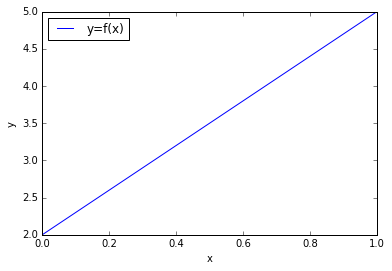

In [29]:
a, b = 3, 2
f = lambda x: a * x + b
gx = np.linspace(0.,1,100)
gy = [f(x) for x in gx]
plt.plot(gx, gy, label='y=f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')


## Generating the trainin data

Then we generate the training data points by adding a random error to sampling points from the ground truth line.
30 data points are generated.

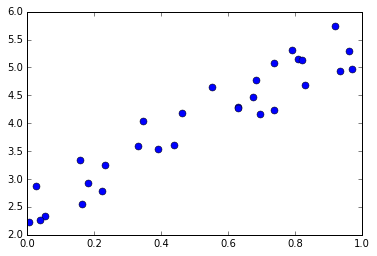

In [30]:
nb_points = 30

# generate training data
train_x = np.asarray(np.random.uniform(0., 1., nb_points), np.float32)
train_y = np.asarray(f(train_x) + np.random.rand(30), np.float32)
plt.plot(train_x, train_y, 'bo', ms=7)

## Training via SGD

Assuming that we know the training data points are sampled from a line, but we don't know the line slope and offset. The training is then to learn the slop (k) and intercept (b) by minimizing the error, i.e. ||kx+b-y||^2. 
1. we set the initial values of k and b (could be any values).
2. we iteratively update k and b by moving them in the direction of reducing the prediction error, i.e. in the gradient direction. For every iteration, we plot the learned line.

9.18032938639
6.99725952148
5.33929697673
4.08013102214
3.12383524577
2.39755630493
1.84596570333
1.42704442342
1.10888010661
0.867236455282
0.6837073644
0.544314193726
0.438440195719
0.358023166656
0.29693962733


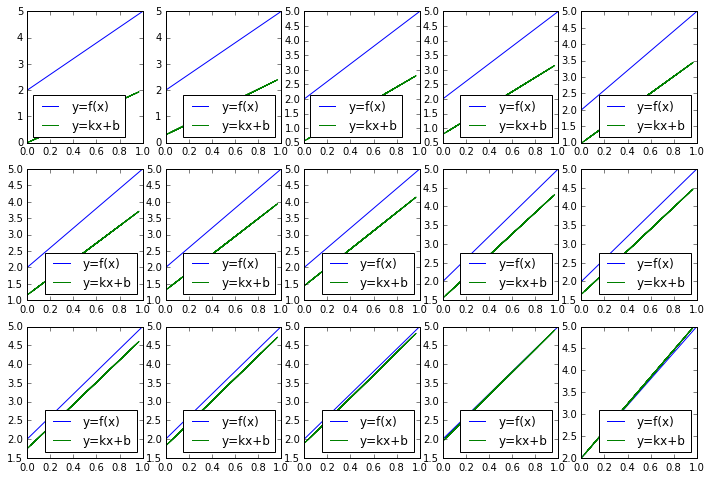

In [31]:
# to plot the intermediate results
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
def plot(idx, x, y):
    global gx, gy, axes
    # print the ground truth line
    axes[idx/5, idx%5].plot(gx, gy, label='y=f(x)')     
    # print the learned line
    axes[idx/5, idx%5].plot(x, y, label='y=kx+b')
    axes[idx/5, idx%5].legend(loc='best')

# set hyper-parameters
max_iter = 15
alpha = 0.1

# init parameters
k, b = 2.,0.


x = tensor.from_numpy(train_x)
y = tensor.from_numpy(train_y)
# sgd
for idx in range(max_iter):
    y_ = x * k + b
    err = y_ - y
    loss = tensor.sum(err * err) / nb_points
    print loss
    da1 = tensor.sum(err * x) / nb_points
    db1 = tensor.sum(err) / nb_points
    # update the parameters
    k -= da1 * alpha
    b -= db1 * alpha
    plot(idx, tensor.to_numpy(x), tensor.to_numpy(y_))


We can see that the learned line is becoming closer to the ground truth line.